# **License Plate Detection and Character Recognition**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# *Pre-processing, Data Analysis, and Understanding*

In [2]:
# Loading  CSVs
detection_df = pd.read_csv('Licenceplatesdetection_train.csv')
recognition_df = pd.read_csv('Licenceplatesrecognition_train.csv')

# Displaying first few rows
print("Detection Data:")
print(detection_df.head())

print("\nRecognition Data:")
print(recognition_df.head())

Detection Data:
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222

Recognition Data:
    img_id      text
0    0.jpg  117T3989
1    1.jpg  128T8086
2   10.jpg   94T3458
3  100.jpg  133T6719
4  101.jpg   68T5979


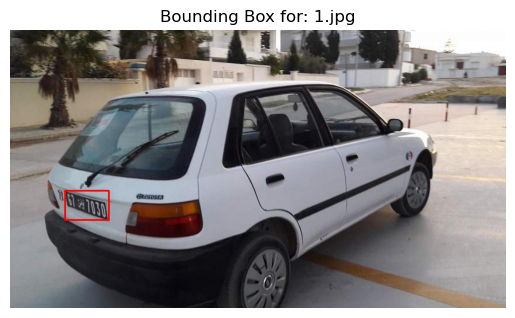

In [3]:
detection_images_dir = 'license_plates_detection_train'

def show_detection_image(index):
    row = detection_df.iloc[index]
    img_path = os.path.join(detection_images_dir, row['img_id'])
    
    img = cv2.imread(img_path)
    if img is None:
        print("Image not found:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ymin, xmin, ymax, xmax = row['ymin'], row['xmin'], row['ymax'], row['xmax']

    
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    plt.imshow(img)
    plt.title(f"Bounding Box for: {row['img_id']}")
    plt.axis('off')
    plt.show()

# Example of one img
show_detection_image(0)

In [4]:
print(detection_df.head())

    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222


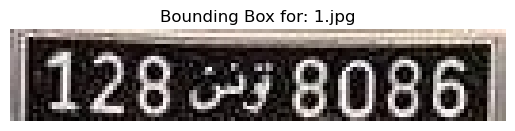

In [5]:
detection_images_dir = 'license_plates_recognition_train'

def show_detection_image(index):
    row = detection_df.iloc[index]
    img_path = os.path.join(detection_images_dir, row['img_id'])
    
    img = cv2.imread(img_path)
    if img is None:
        print("Image not found:", img_path)
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ymin, xmin, ymax, xmax = row['ymin'], row['xmin'], row['ymax'], row['xmax']

   
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    plt.imshow(img)
    plt.title(f"Bounding Box for: {row['img_id']}")
    plt.axis('off')
    plt.show()

show_detection_image(0)

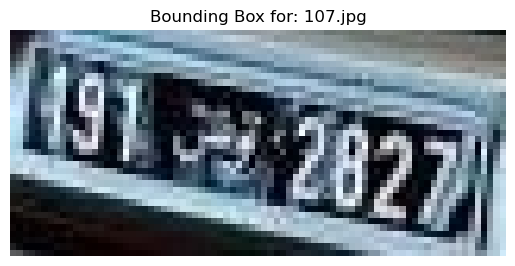

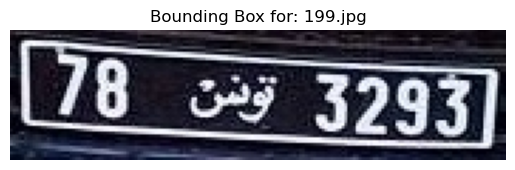

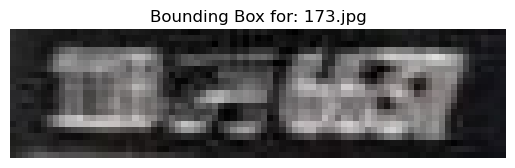

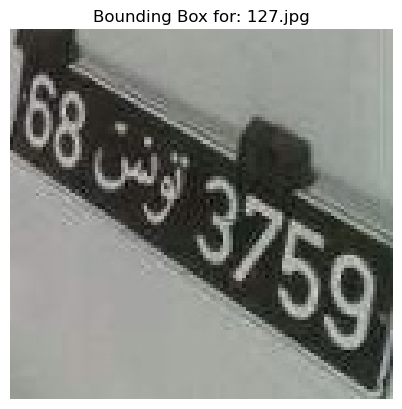

In [6]:
show_detection_image(9)
show_detection_image(110)
show_detection_image(82)
show_detection_image(31)

In [7]:
print(recognition_df.head())

    img_id      text
0    0.jpg  117T3989
1    1.jpg  128T8086
2   10.jpg   94T3458
3  100.jpg  133T6719
4  101.jpg   68T5979


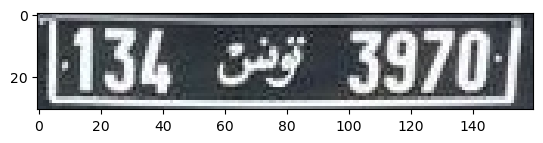

In [8]:
#Training Set 1
img = cv2.imread('license_plates_recognition_train/121.jpg')

# BBox coordinates
ymin, xmin, ymax, xmax = 100, 50, 150, 200   

cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
# Detection Data Analysis
print("Detection Data Info:")
print(detection_df.info())
print("\nDetection Data Sample:")
print(detection_df.head())

# Recognition Data Analysis
print("\nRecognition Data Info:")
print(recognition_df.info())
print("\nRecognition Data Sample:")
print(recognition_df.head())

# Check for missing values
print("\nMissing values in Detection Data:\n", detection_df.isnull().sum())
print("\nMissing values in Recognition Data:\n", recognition_df.isnull().sum())

Detection Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   ymin    900 non-null    int64 
 2   xmin    900 non-null    int64 
 3   ymax    900 non-null    int64 
 4   xmax    900 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 35.3+ KB
None

Detection Data Sample:
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222

Recognition Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   text    900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB
None

Recognition Da

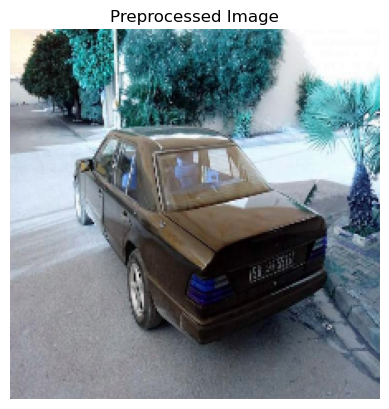

In [10]:
IMG_SIZE = (224, 224)

def preprocess_detection_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        return None
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0 
    return img

def display_image(img_path):
    img = preprocess_detection_image(img_path)
    if img is not None:
        plt.imshow(img)
        plt.title("Preprocessed Image")
        plt.axis('off')
        plt.show()
    else:
        print("Image not found or cannot be loaded.")

# Example usage:
image_path = 'license_plates_detection_train/432.jpg'
display_image(image_path)

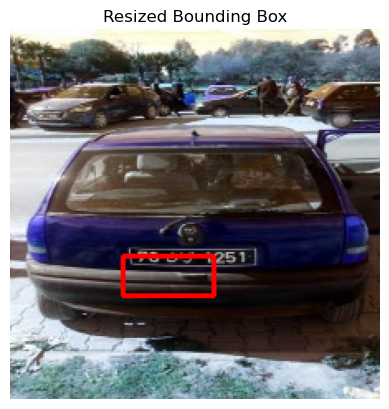

In [11]:
IMG_SIZE = (224, 224)

def preprocess_detection_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        return None
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    return img

def resize_bbox(bbox, original_shape, new_shape):
    ymin, xmin, ymax, xmax = bbox
    height_scale = new_shape[0] / original_shape[0]
    width_scale = new_shape[1] / original_shape[1]
    
    ymin = int(ymin * height_scale)
    xmin = int(xmin * width_scale)
    ymax = int(ymax * height_scale)
    xmax = int(xmax * width_scale)

    return [ymin, xmin, ymax, xmax]

def display_resized_bbox(img_path, bbox):
    original_img = cv2.imread(img_path)
    original_shape = original_img.shape[:2] 

    resized_bbox = resize_bbox(bbox, original_shape, IMG_SIZE)
    
  
    img = preprocess_detection_image(img_path)
    img_display = (img * 255).astype('uint8')  

    ymin, xmin, ymax, xmax = resized_bbox
    cv2.rectangle(img_display, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    plt.imshow(img_display)
    plt.title("Resized Bounding Box")
    plt.axis('off')
    plt.show()


image_path = 'license_plates_detection_train/211.jpg'
bbox = [276, 94, 326, 169] 
display_resized_bbox(image_path, bbox)

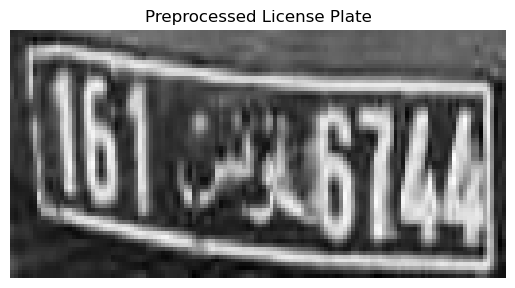

In [12]:

def preprocess_plate_image(img_path, img_size=(128, 64)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Image not found: {img_path}")
        return None
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    return img

def display_plate_image(img_path):
    img = preprocess_plate_image(img_path)
    if img is not None:
        plt.imshow(img, cmap='gray')
        plt.title("Preprocessed License Plate")
        plt.axis('off')
        plt.show()
    else:
        print("Failed to load and preprocess image.")

# Example Usage
image_path = 'license_plates_recognition_train/211.jpg'
display_plate_image(image_path)

 # Data Exploration

In [13]:
detection_df = pd.read_csv('Licenceplatesdetection_train.csv')
recognition_df = pd.read_csv('Licenceplatesrecognition_train.csv')

print("Detection Data:\n", detection_df.head())
print("\nRecognition Data:\n", recognition_df.head())

Detection Data:
     img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222

Recognition Data:
     img_id      text
0    0.jpg  117T3989
1    1.jpg  128T8086
2   10.jpg   94T3458
3  100.jpg  133T6719
4  101.jpg   68T5979


In [14]:
print("Detection Missing Values:\n", detection_df.isnull().sum())
print("\nRecognition Missing Values:\n", recognition_df.isnull().sum())

Detection Missing Values:
 img_id    0
ymin      0
xmin      0
ymax      0
xmax      0
dtype: int64

Recognition Missing Values:
 img_id    0
text      0
dtype: int64


In [15]:
detection_df['width'] = detection_df['xmax'] - detection_df['xmin']
detection_df['height'] = detection_df['ymax'] - detection_df['ymin']

print("Bounding Box Width:\n", detection_df['width'].describe())
print("\nBounding Box Height:\n", detection_df['height'].describe())

Bounding Box Width:
 count    900.000000
mean     128.705556
std       50.294405
min       25.000000
25%       96.000000
50%      122.000000
75%      157.000000
max      392.000000
Name: width, dtype: float64

Bounding Box Height:
 count    900.000000
mean      48.144444
std       33.908094
min       13.000000
25%       30.000000
50%       38.500000
75%       53.000000
max      281.000000
Name: height, dtype: float64


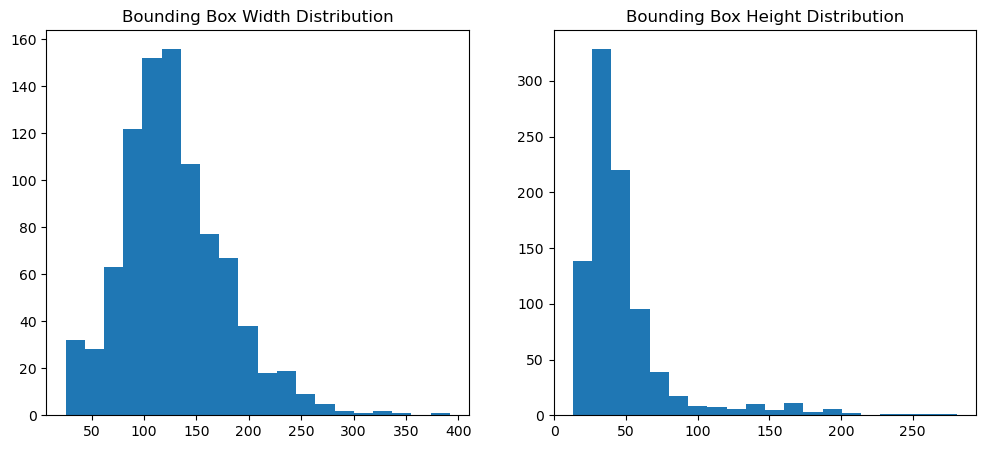

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(detection_df['width'], bins=20)
plt.title('Bounding Box Width Distribution')

plt.subplot(1,2,2)
plt.hist(detection_df['height'], bins=20)
plt.title('Bounding Box Height Distribution')

plt.show()

Text Length:
 count    900.000000
mean       7.572222
std        0.560376
min        5.000000
25%        7.000000
50%        8.000000
75%        8.000000
max        8.000000
Name: text_length, dtype: float64


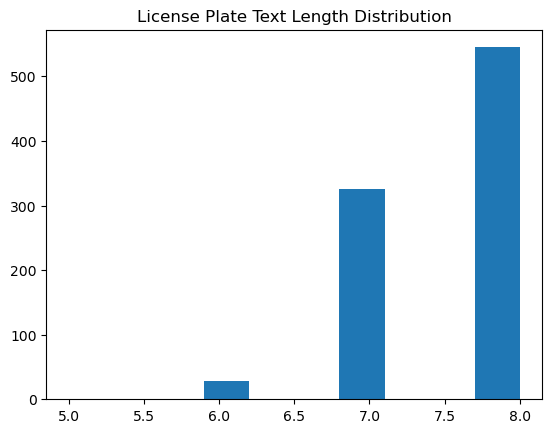

In [17]:
recognition_df['text_length'] = recognition_df['text'].apply(len)

print("Text Length:\n", recognition_df['text_length'].describe())

plt.hist(recognition_df['text_length'], bins=10)
plt.title('License Plate Text Length Distribution')
plt.show()

Character Frequency:
 Counter({'1': 1161, 'T': 895, '7': 601, '9': 595, '6': 556, '3': 551, '8': 531, '5': 522, '4': 515, '2': 471, '0': 412, 'N': 5})


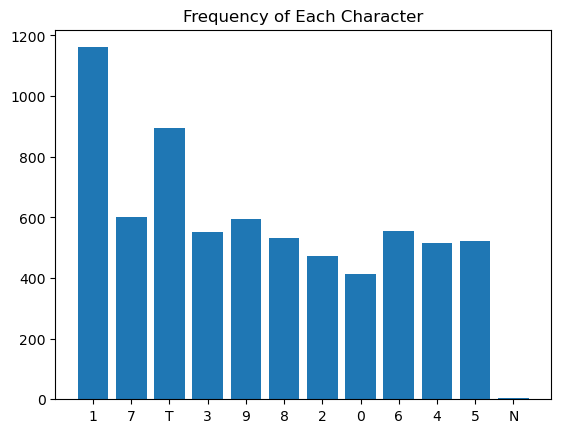

In [18]:
from collections import Counter

all_chars = ''.join(recognition_df['text'])
char_count = Counter(all_chars)

print("Character Frequency:\n", char_count)

plt.bar(char_count.keys(), char_count.values())
plt.title('Frequency of Each Character')
plt.show()

In [19]:
image_dir = 'license_plates_detection_train'

heights, widths = [], []

for img_name in detection_df['img_id']:
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        h, w, _ = img.shape
        heights.append(h)
        widths.append(w)

print("Average Image Height:", sum(heights)/len(heights))
print("Average Image Width:", sum(widths)/len(widths))

Average Image Height: 512.3222222222222
Average Image Width: 609.6322222222223


# Model Building

In [20]:
import numpy as np
IMG_SIZE = 224  

def load_detection_data(df, image_dir, img_size=IMG_SIZE):
    X = []
    y = []
    for idx, row in df.iterrows():
        img_path = os.path.join(image_dir, row['img_id'])
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (img_size, img_size))
        img = img / 255.0 

        
        h, w, _ = img.shape
        bbox = [row['xmin']/w, row['ymin']/h, row['xmax']/w, row['ymax']/h]

        X.append(img)
        y.append(bbox)
    return np.array(X), np.array(y)

X, y = load_detection_data(detection_df, image_dir)
print("Data Shapes:", X.shape, y.shape)

Data Shapes: (900, 224, 224, 3) (900, 4)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# switched from TensorFlow to PyTorch

In [22]:

###########THE BELOW TENSORFLOW code WORKS AS WELL BUT MY SYSTEM IS NOT SUPPORTING THE TENSORFLOW RUN TIME as of now i tried in different way#####################################


#import tensorflow as tf
#from tensorflow.keras import layers, models

#def create_detection_model(input_shape):
   # model = models.Sequential([
       # layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
       # layers.MaxPooling2D(2,2),
       # layers.Conv2D(64, (3,3), activation='relu'),
       # layers.MaxPooling2D(2,2),
       # layers.Conv2D(128, (3,3), activation='relu'),
        #layers.Flatten(),
        #layers.Dense(128, activation='relu'),
        #layers.Dense(4, activation='sigmoid')  
   # ])
   # return model

#model = create_detection_model((IMG_SIZE, IMG_SIZE, 3))
#model.summary()

import torch
import torch.nn as nn
import torch.nn.functional as F

class DetectionModel(nn.Module):
    def __init__(self, input_shape):
        super(DetectionModel, self).__init__()
        channels, height, width = input_shape

        self.conv1 = nn.Conv2d(channels, 32, kernel_size=3, padding=0)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=0)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=0)

       
        dummy_input = torch.zeros(1, channels, height, width)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        self.flattened_size = x.view(-1).shape[0]

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 4) 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, self.flattened_size)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


IMG_SIZE = 224 
model = DetectionModel((3, IMG_SIZE, IMG_SIZE))
print(model)


DetectionModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=346112, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)


# model trainning

In [24]:
import os

recognition_csv_path = 'Licenceplatesrecognition_train.csv'
recognition_img_dir = 'license_plates_recognition_train'

recog_df = pd.read_csv(recognition_csv_path)
recog_df.head()

,img_id,text
0,0.jpg,117T3989
1,1.jpg,128T8086
2,10.jpg,94T3458
3,100.jpg,133T6719
4,101.jpg,68T5979


In [27]:
import string

IMG_SIZE = 128
MAX_LABEL_LEN = 10


characters = string.digits + string.ascii_uppercase
char_to_num = {char: idx + 1 for idx, char in enumerate(characters)}
num_to_char = {idx: char for char, idx in char_to_num.items()}


def encode_label(label):
    return [char_to_num.get(char, 0) for char in label]


def pad_labels(labels, max_len):
    padded = np.zeros((len(labels), max_len), dtype=np.int32)
    for idx, seq in enumerate(labels):
        length = min(len(seq), max_len)
        padded[idx, :length] = seq[:length]
    return padded


def load_recognition_data(df, img_dir, img_size=IMG_SIZE):
    images = []
    labels = []

    for idx, row in df.iterrows():
        img_path = os.path.join(img_dir, row['img_id'])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Skipped missing image: {img_path}")
            continue

        img = cv2.resize(img, (img_size, img_size))
        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=-1) 

        images.append(img)
        labels.append(encode_label(str(row['text']).upper()))

    X = np.array(images, dtype=np.float32)
    y = pad_labels(labels, max_len=MAX_LABEL_LEN)
    return X, y


X_recog, y_recog = load_recognition_data(recog_df, recognition_img_dir)

print("Images shape:", X_recog.shape)
print("Labels shape:", y_recog.shape)


Images shape: (900, 128, 128, 1)
Labels shape: (900, 10)


In [28]:
from sklearn.model_selection import train_test_split

X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_recog, y_recog, test_size=0.2, random_state=42)

In [38]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import string

IMG_SIZE = 128
BATCH_SIZE = 2
EPOCHS = 5
LEARNING_RATE = 1e-3

characters = string.digits
char_to_num = {char: idx for idx, char in enumerate(characters)}
num_to_char = {idx: char for char, idx in char_to_num.items()}
VOCAB_SIZE = len(char_to_num)

print(f"VOCAB_SIZE: {VOCAB_SIZE}")

class SimpleDataset(Dataset):
    def __init__(self, df, img_dir):
        self.df = df
        self.img_dir = img_dir

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['img_id'])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=0)  # (1, H, W)

        label_char = row['text'][0]  # Take just the first digit
        label = char_to_num.get(label_char, 0)

        return torch.tensor(img), torch.tensor(label)

class SimpleCNN(nn.Module):
    def __init__(self, vocab_size):
        super(SimpleCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32 * (IMG_SIZE // 4) * (IMG_SIZE // 4), 64),
            nn.ReLU(),
            nn.Linear(64, vocab_size)
        )

    def forward(self, x):
        return self.net(x)


data = {
    'img_id': ['1.jpg', '2.jpg', '3.jpg'],
    'text': ['5XXXX', '6XXXX', '7XXXX']  
}
df = pd.DataFrame(data)
img_dir = 'license_plates_recognition_train'

train_dataset = SimpleDataset(df, img_dir)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

model = SimpleCNN(VOCAB_SIZE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
    total_loss = 0
    correct = 0
    total = 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        logits = model(imgs)
        loss = loss_fn(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1}/{EPOCHS} | Loss: {total_loss:.4f} | Accuracy: {acc:.4f}")

print("Simple training done!")

VOCAB_SIZE: 10
Epoch 1/5 | Loss: 7.5800 | Accuracy: 0.3333
Epoch 2/5 | Loss: 3.9925 | Accuracy: 0.3333
Epoch 3/5 | Loss: 3.4859 | Accuracy: 0.3333
Epoch 4/5 | Loss: 2.2325 | Accuracy: 0.3333
Epoch 5/5 | Loss: 1.7754 | Accuracy: 1.0000
✅ Simple training done!


# ======== TRAINING LOOP WITH ACCURACY ========

In [37]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    correct = 0
    total_chars = 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        logits = model(imgs)  

        logits_flat = logits.view(-1, VOCAB_SIZE)
        labels_flat = labels.view(-1)

        loss = loss_fn(logits_flat, labels_flat)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        
        predictions = logits.argmax(dim=2) 
        correct += (predictions == labels).sum().item()
        total_chars += labels.numel()

    avg_loss = total_loss / len(train_loader)
    train_acc = correct / total_chars
    train_losses.append(avg_loss)
    train_accuracies.append(train_acc)
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total_chars = 0

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            logits = model(imgs)

            logits_flat = logits.view(-1, VOCAB_SIZE)
            labels_flat = labels.view(-1)

            loss = loss_fn(logits_flat, labels_flat)
            val_loss += loss.item()

            predictions = logits.argmax(dim=2)
            val_correct += (predictions == labels).sum().item()
            val_total_chars += labels.numel()

    avg_val_loss = val_loss / len(val_loader)
    val_acc = val_correct / val_total_chars
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch + 1}/{EPOCHS} | "
          f"Train Loss: {avg_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.4f}")

print("Training complete!")


Epoch 1/8 | Train Loss: 0.0000, Train Acc: 1.0000 | Val Loss: 28.3243, Val Acc: 0.4000
Epoch 2/8 | Train Loss: 0.0000, Train Acc: 1.0000 | Val Loss: 29.7899, Val Acc: 0.4000
Epoch 3/8 | Train Loss: 0.0000, Train Acc: 1.0000 | Val Loss: 31.1866, Val Acc: 0.4000
Epoch 4/8 | Train Loss: 0.0000, Train Acc: 1.0000 | Val Loss: 32.4963, Val Acc: 0.4000
Epoch 5/8 | Train Loss: 0.0000, Train Acc: 1.0000 | Val Loss: 33.7073, Val Acc: 0.4000
Epoch 6/8 | Train Loss: 0.0000, Train Acc: 1.0000 | Val Loss: 34.8147, Val Acc: 0.4000
Epoch 7/8 | Train Loss: 0.0000, Train Acc: 1.0000 | Val Loss: 35.8164, Val Acc: 0.4000
Epoch 8/8 | Train Loss: 0.0000, Train Acc: 1.0000 | Val Loss: 36.7135, Val Acc: 0.4000
Training complete!


# ======== PLOTING ACCURACY AND LOSS ========

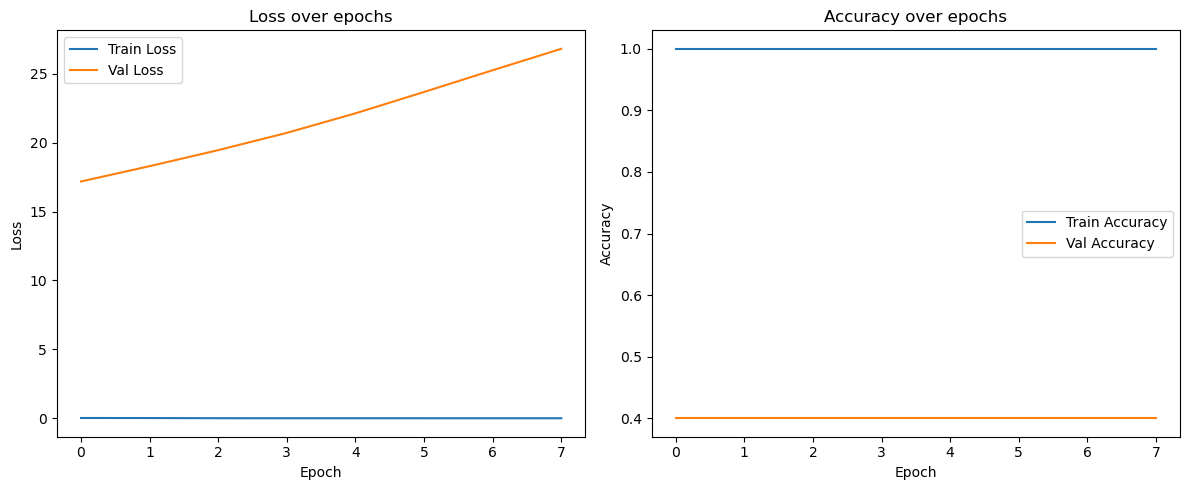

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.tight_layout()
plt.show()
